In [1]:
import gym
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

from datetime import datetime
from main import EvolutionStrategy
from policies import NN


np.set_printoptions(precision=5, suppress=True)

In [2]:
n_gens = 1000
hidden_units = 64
pop_size = 100

results = np.load(f'.\\results\\ES_hidden_units_{hidden_units}_pop_size_{pop_size}\\temp_gen_{n_gens}.npz')
pop = results['pop']
results.files

['pop', 'best_fitness_per_gen', 'avg_fitness_per_gen']

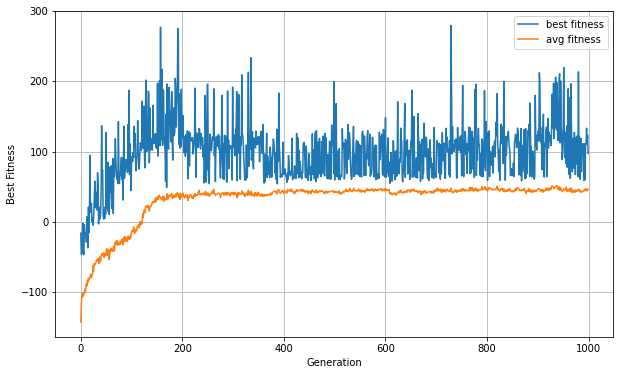

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(n_gens), results['best_fitness_per_gen'][:n_gens], label='best fitness')
ax.plot(np.arange(n_gens), results['avg_fitness_per_gen'][:n_gens], label='avg fitness')
ax.set_ylabel('Best Fitness')
ax.set_xlabel('Generation')
ax.legend(loc='best')
ax.grid()
# plt.savefig(f'.\\results\\ES_hidden_units_{hidden_units}_pop_size_{pop_size}\\plot_results.png', dpi=500)
plt.show()

In [40]:
env = gym.make("LunarLander-v2")

observation, info = env.reset(seed=np.random.randint(2**16-1), return_info=True)

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

policy = NN(input_dim=input_dim, output_dim=output_dim, hidden_units=hidden_units)
dim = policy.params_size()

frames = []
policy.set_weights(pop[:dim, -2])

total_reward = 0.0
done = False
while not done:
    env.render()
    # frames.append(env.render(mode='rgb_array'))
    action = policy(observation)
    observation, reward, done, info = env.step(action)
    print(np.round(reward, 3), end=', ')
    total_reward += reward

    if done:
        print(f'Reward {total_reward}')

env.close()
# imageio.mimsave(os.path.join('.', 'movie.gif'), frames, format='GIF', fps=60)

1.648, 1.483, 1.426, 1.666, 1.98, 2.175, 2.345, 2.49, 2.629, 2.121, 0.605, -0.206, -1.515, -2.629, -3.266, -1.747, -2.084, -2.392, -2.632, -2.547, -2.341, -2.145, -2.019, -1.753, -1.617, -1.214, -1.07, -0.807, -0.561, -0.297, -0.109, -0.081, -0.238, -0.373, 4.457, -1.115, -1.921, -1.772, -1.414, -1.625, 4.452, 3.373, 0.61, 3.268, 1.95, -1.412, 2.183, 1.628, 4.627, -1.291, -1.559, 0.74, 2.049, 4.857, 0.869, 3.281, 3.693, -1.392, -1.61, 1.879, 2.551, 1.154, 2.076, 2.119, 3.965, -1.899, -1.176, 4.115, 5.086, -1.896, -1.358, 0.705, 1.212, 0.853, 0.673, 5.05, -1.399, -1.715, 3.97, -1.261, -1.648, 2.27, 2.751, -1.324, 1.189, 4.169, -1.757, 0.575, 2.355, 2.127, 2.234, 0.607, 1.815, 2.639, 2.165, -1.947, -1.642, 4.078, -1.92, 2.437, -1.622, 2.902, 1.956, 2.356, -1.909, -1.654, 1.842, 0.263, 2.715, 3.879, -1.884, -1.711, 3.963, -1.916, -1.713, 0.935, 3.841, -1.822, 0.6, -1.805, 4.537, -1.789, 2.82, 0.539, 4.65, -1.842, -1.848, 1.152, 2.697, -1.692, -1.742, 2.41, -1.873, 2.28, 2.383, 0.492, 1.69

In [15]:
EvolutionStrategy(hidden_units=hidden_units).fitness(pop)[0]

array([  45.96995,   42.74872,    1.89709,  -92.90743,    0.93849,
         33.92915,   50.86829, -157.32166, -124.81062,   26.52399,
        -49.82968, -118.29455,   -3.35061,   37.01448,   26.70598,
         28.19349,   29.03121,  -78.6686 ,   22.16267,   29.21589,
         -2.19637,   30.00336, -221.63717,   36.90176,   45.66537,
         16.13131,  -84.98829,   35.5089 ,    5.76206, -107.23454,
         40.29576,   34.84487,   41.92743,  -39.1638 , -103.29036,
         38.49168, -207.12116,   21.15803,   26.39514,   47.7558 ,
         42.51331,   33.88671,   40.76183,   32.39325,   34.17702,
         36.9472 ,   38.40951,   22.38758,   29.29391, -116.71384,
         22.68058,   46.09837,   40.5291 ,   30.53156,   39.44381,
          8.41042,   32.90697,   19.14324,  -75.12085,   19.30099,
         50.05731,   19.33564,   40.17107,    3.38401,   35.31966,
        -18.93979,   36.88389,  -89.70538,   56.95961,   12.05342,
         50.12332,   22.54222,   46.64541,   29.8642 ,   44.64

In [21]:
pop[dim:, 0]

array([ 1580.75539,   632.47156,   462.60415,  1134.629  ,   151.11375,
        1568.85478,  2967.21034,  1540.39739,  5145.52058,   788.27161,
        1941.55628, 18233.25308,  2526.46608,  1935.10639,   668.5188 ,
        5403.26592,  1330.39364,   950.34228, 14584.19188,  1695.41248,
         290.94582, 11478.3775 ,  2166.34216,  2102.33143,  2330.39217,
        1104.62109,  7784.4343 ,   841.46617,  1305.6481 ,  8649.85203,
         555.7378 ,  5094.02337,  2079.16935,  5380.17793,  1140.86158,
        9209.11711,   678.52409,  1736.65054, 59917.0175 ,  4797.36172,
        6608.59368,  9999.1196 ,   967.94039,  1626.70221,   737.6359 ,
        1239.54764,  3655.1105 ,  3661.51185,  2363.85761,  1213.49467,
        1424.20269,   821.2885 ,  2833.63125,  1815.66906,  1087.90726,
         224.07957,  1427.78017,  9871.62073,  3193.65999,  1368.70655,
         900.08162,  3558.12107,  4907.77785,  9902.00152,  1623.76238,
        2365.11712,  3825.49489,  3041.5744 ,  4192.15289,  2554

836